<a href="https://colab.research.google.com/github/yleessam/dl/blob/main/5_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


[실습] Python을 활용한 AI 모델링 - 머신러닝 파트

* 이번시간에는 Python을 활용한 AI 모델링에서 머신러닝에 대해 실습해 보겠습니다.
* 머신러닝 모델에는 아래와 같이 모델들이 있습니다.
* 단일 분류예측 모델 : LogisticRegression, KNN, DecisionTree
* 앙상블(Ensemble) 모델 : RandomForest, XGBoost, LGBM, Stacking, Weighted Blending

솔직히, 머신러닝이 딥러닝보다 코딩하기 쉽습니다. 4줄 템플릿에 맞쳐 코딩하면 되기 때문입니다.

* 그래도, 한가지 당부 드리고 싶은 말은 "백문이불여일타" 입니다.
* 이론보다 실습이 더 많은 시간과 노력이 투자 되어야 합니다.

학습목차
1. 실습을 위한 KT AIDU 환경변수 설정
2. 머신러닝 모델 프로세스
* 데이터 가져오기
* 데이터 전처리
* Train, Test 데이터셋 분할
* 데이터 정규화
* 단일 분류예측 모델 : LogisticRegression, KNN, DecisionTree
* 앙상블(Ensemble) 모델 : RandomForest, XGBoost, LGBM, Stacking, Weighted Blending


In [ ]:
import warnings
warnings.filterwarnings(action = 'ignore')

2 머신러닝 모델 프로세스

1. 라이브러리 임포트(import)
2. 데이터 가져오기(Loading the data)
3. 탐색적 데이터 분석(Exploratory Data Analysis)
4. 데이터 전처리(Data PreProcessing) :데이터타입 변환, Null 데이터 처리,누락데이터 처리, 더미특성 생성, 특성 추출 (feature engineering)등
5. Train, Test 데이터셋 분할
6. 데이터 정규화(Normalizing the Data)
7. 모델 개발(Creating the Model)
8. 모델 성능 평가


1 라이브러리 임포트



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2 데이터 로드

cust data.csv 파일 컬럼명

고객등급(cust_class), 성별(sex_type),나이(age), 사용서비스수(efct_svc_count),
서비스중지여부 (dt_stop_yn), 미납여부(npay_yn)
3개월 평균 요금(r3m_avg_bill_amt), A서비스3개월 평균요금(r3m_A_avg_arpu amt), B서비스3개월 평균요금(r3m_B_avg_arpu amt), 해지여부(termination_yn)

In [ ]:
df = pd.read_csv('cust_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   class        26 non-null     object 
 1   sex          28 non-null     object 
 2   age          30 non-null     int64  
 3   service      30 non-null     int64  
 4   stop         30 non-null     object 
 5   npay         30 non-null     object 
 6   avg_bill     30 non-null     float64
 7   A_bill       30 non-null     float64
 8   B_bill       30 non-null     float64
 9   termination  30 non-null     object 
 10  by_age       30 non-null     int64  
 11  bill_rating  30 non-null     object 
dtypes: float64(3), int64(3), object(6)
memory usage: 2.9+ KB


<Axes: >

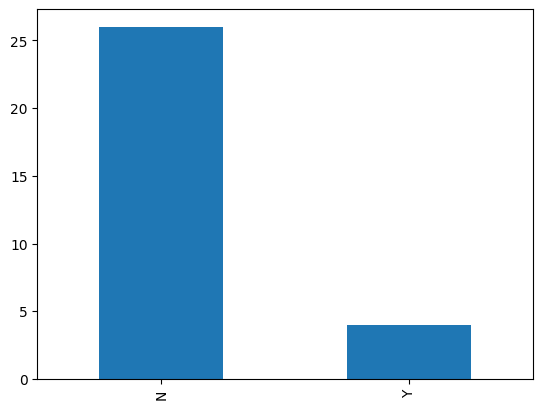

In [ ]:
#y값 해지여부

df['termination'].value_counts().plot(kind='bar')

4 데이터 전처리

Object 컬럼에 대해 Pandas get dummies 함수 활용하여 One-Hot-Encoding

In [ ]:
cal_cols = ['class', 'sex', 'stop', 'npay', 'termination', 'bill_rating']
df1 = pd.get_dummies(data=df, columns=cal_cols, drop_first = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  30 non-null     int64  
 1   service              30 non-null     int64  
 2   avg_bill             30 non-null     float64
 3   A_bill               30 non-null     float64
 4   B_bill               30 non-null     float64
 5   by_age               30 non-null     int64  
 6   class_D              30 non-null     uint8  
 7   class_E              30 non-null     uint8  
 8   class_F              30 non-null     uint8  
 9   class_G              30 non-null     uint8  
 10  sex_M                30 non-null     uint8  
 11  npay_Y               30 non-null     uint8  
 12  termination_Y        30 non-null     uint8  
 13  bill_rating_low      30 non-null     uint8  
 14  bill_rating_lowmid   30 non-null     uint8  
 15  bill_rating_mid      30 non-null     uint8

5. Train, Test 데이터셋 분할


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#전체데이터에서 X,y 컬럼을 추출한다.

X = df1.drop('termination_Y',axis=1).values
y = df1['termination_Y'].values

In [ ]:
#random_state=42  돌때마다 똑같은 결과가 나오게 한다

X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
X_train.shape

(21, 16)

In [ ]:
y_train.shape

(21,)

6. 데이터 정규화/스케일링 (normalizing/scaling)

In [ ]:
df1.tail()
#컬럼별로 값의 크기 차이가 크다. > 같은 비율을 갖게 한다.

,age,service,avg_bill,A_bill,B_bill,by_age,class_D,class_E,class_F,class_G,sex_M,npay_Y,termination_Y,bill_rating_low,bill_rating_lowmid,bill_rating_mid,bill_rating_midhigh
25,19,0,2438.70000,2217.0000,0.00000,15,0,0,0,0,0,0,0,1,0,0,0
26,55,1,11303.66660,1578.9999,6782.19996,55,1,0,0,0,0,0,0,0,0,0,1
27,22,2,15673.79011,1703.3001,12545.60000,20,0,0,0,1,1,0,0,0,0,0,0
28,58,1,9604.90685,2033.0001,6698.73340,55,0,1,0,0,1,0,0,0,0,1,0
29,53,1,1821.60000,1656.0000,0.00000,50,1,0,0,0,1,1,0,1,0,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
#y값은 안해도 되나???
#y_train = scaler.fit_transform(y_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train[:2], y_train[:2]

(array([[0.14492754, 0.        , 0.04351343, 0.29128357, 0.12625941,
         0.14285714, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 1.        , 0.        , 0.        ,
         0.        ],
        [0.08695652, 0.5       , 1.        , 0.64067678, 0.44044127,
         0.07142857, 1.        , 0.        , 0.        , 0.        ,
         0.        , 1.        , 0.        , 0.        , 0.        ,
         0.        ]]),
 array([1, 0], dtype=uint8))

In [ ]:
X_train.shape

(21, 16)

In [ ]:
y_train.shape

(21,)

7 모델 개발

모델별 바차트 그려주고 성능 확인을 위한 함수

In [ ]:
# 모델별로 Accuracy 점수 저장
# 모델 Accuracy 점수 순서대로 바차트를 그려 모델별로 성능 확인 가능
from sklearn.metrics import accuracy_score

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive',
'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray',
'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
]

# 모델명, 예측값, 실제값을 주면 위의 plot_predictions 함수 호출하여 Scatter 그래프 그리며
# 모델별 MSE 값을 Bar chart 로 그려줌
def accuracy_eval(name, pred, actual):
  global predictions
  global colors

  plt. figure(figsize=(12, 9))
  acc = accuracy_score(actual, pred)
  my_predictions [name] = acc * 100
  y_value = sorted (my_predictions.items (), key=lambda x: x[1], reverse=True)
  df = pd.DataFrame (y_value, columns=['model', 'accuracy'])
  print (df)

  length = len(df)
  plt.figure(figsize=(10,length))
  ax = plt.subplot()
  ax.set_yticks(np.arange(len (df)))
  ax.set_yticklabels (df['model'], fontsize=15)
  bars = ax.barh(np.arange (len (df)), df['accuracy'])

  for i, v in enumerate(df['accuracy']):
    idx= np.random.choice(len(colors))
    bars[i].set_color (colors [idx])
    ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
  plt.title('accuracy', fontsize=18)
  plt.xlim (0, 100)
  plt.show()

1) 로지스틱 회귀 (Logistic Reression, 분류)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score
from sklearn.metrics import classification_report

In [ ]:
lg = LogisticRegression(C=1.0, max_iter=2000)
lg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [ ]:
lg.score(X_test, y_test)

0.8888888888888888

In [ ]:
#하이퍼파라미터의 조정 > 차이가 없음
#원래 데이터를 넣으면 0.929가 나옴
lg = LogisticRegression(C=1.0, max_iter=3000)
lg.fit(X_train, y_train)
lg.score(X_test, y_test)

0.8888888888888888

* 분류기 성능 평가 지표

In [ ]:
lg_pred = lg.predict(X_test)
#오차행렬
#TN FP
#FN TP
confusion_matrix(y_test, lg_pred)

array([[8, 0],
       [1, 0]])

In [ ]:
#정확도 > 높다
accuracy_score(y_test, lg_pred)

0.8888888888888888

In [ ]:
#정밀도 > 0?  > 현재 데이터에 틀린 것이 없다
precision_score(y_test, lg_pred)

0.0

In [ ]:
#재현율 > 0?  > 현재 데이터에 해당 사항이 없다
recall_score(y_test, lg_pred)

0.0

In [ ]:
#f1스코어 : 정밀도 + 재현율의 평균
f1_score(y_test,lg_pred)

0.0

In [ ]:
print(classification_report(y_test,lg_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.00      0.00      0.00         1

    accuracy                           0.89         9
   macro avg       0.44      0.50      0.47         9
weighted avg       0.79      0.89      0.84         9



                model   accuracy
0  LogisticRegression  88.888889


<Figure size 1200x900 with 0 Axes>

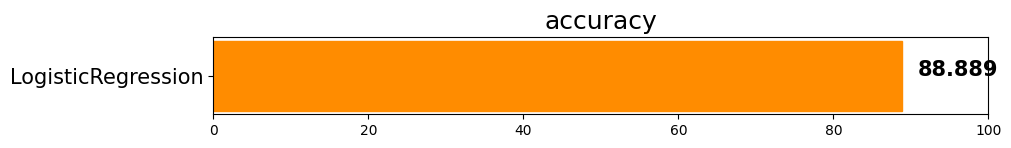

In [ ]:
accuracy_eval('LogisticRegression', lg_pred, y_test)

2) KNN (K-Nearest Neighbor)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_pred = knn.predict(X_test)

                 model   accuracy
0   LogisticRegression  88.888889
1  K-Nearest Neighbors  88.888889


<Figure size 1200x900 with 0 Axes>

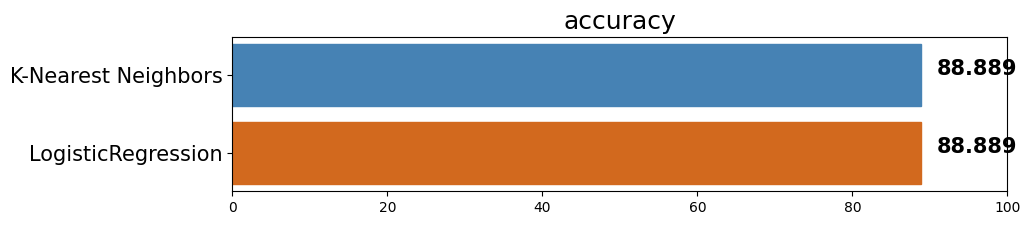

In [ ]:
accuracy_eval('K-Nearest Neighbors', knn_pred, y_test )

3) 결정트리 (Decision Tree)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)


                 model    accuracy
0         DecisionTree  100.000000
1   LogisticRegression   88.888889
2  K-Nearest Neighbors   88.888889


<Figure size 1200x900 with 0 Axes>

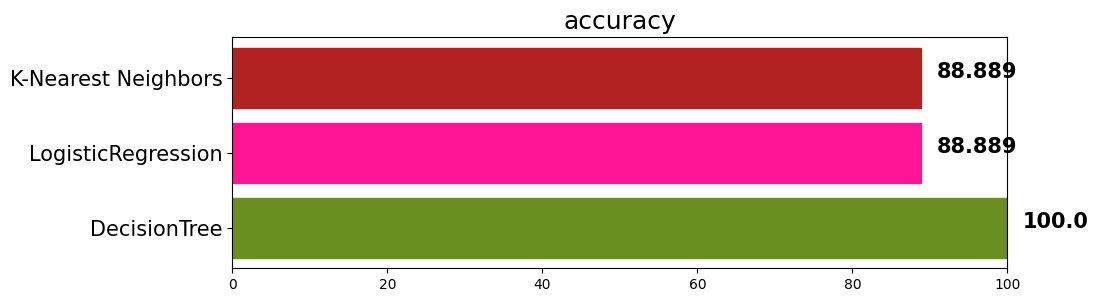

In [ ]:
accuracy_eval('DecisionTree', dt_pred, y_test)

앙상블 기법의 종류

* 배깅 (Bagging): 여러개의 DecisionTree 활용하고 샘플 중복 생성을 통해 결과 도출, RandomForest
* 부스팅 (Boosting): 약한 학습기를 순차적으로 학습을 하되, 이전 학습에 대하여 잘못 예측된 데이터에 가중치를 부여해 오차를 보완해 나가는 방식.XGBoost, LGBM
* 스태킹 (Stacking): 여러 모델을 기반으로 예측된 결과를 통해 Final 학습기(meta 모델)이 다시 한번 예측

4) 랜덤포레스트(RandomForest)

Bagging 대표적인 모델로써, 훈련셋트를 무작위로 각기 다른 서브셋으로 데이터셋을 만들고 여러개의 DecisonTree로 학습하고 다수결로 결정하는 모델

주요 Hyperparameter

* random_state: 랜덤 시드 고정 값. 고정해두고 튜닝할 것!
* n_jobs: CPU 사용 갯수
* max_ depth: 깊어질 수 있는 최대 깊이. 과대적합 방지용
* n_estimators: 앙상블하는 트리의 갯수
* max features: 최대로 사용할 feature의 갯수, 과대적합 방지용
* min_samples_split: 트리가 분할할 때 최소 샘플의 갯수.default=2.과대적합 방지용

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#decision tree 3개 > n_estimators = 3
rfc = RandomForestClassifier(n_estimators=3, random_state=42)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)


                   model    accuracy
0           DecisionTree  100.000000
1  RandomForest Ensemble  100.000000
2     LogisticRegression   88.888889
3    K-Nearest Neighbors   88.888889


<Figure size 1200x900 with 0 Axes>

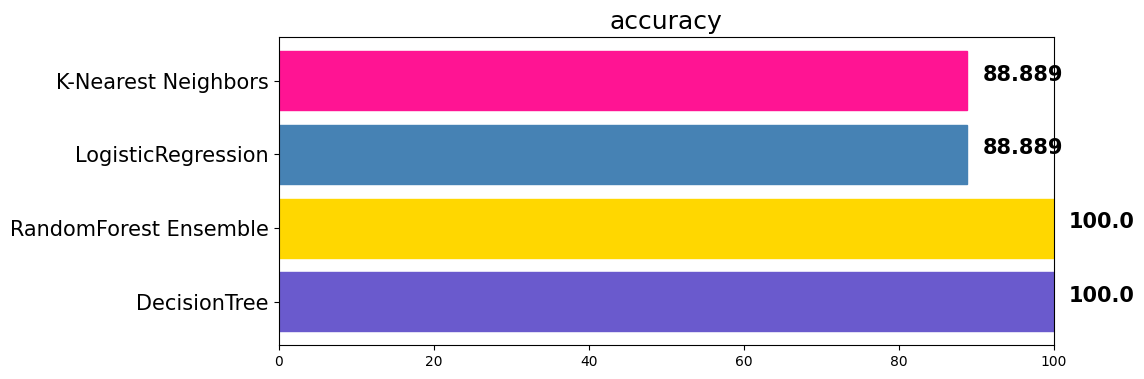

In [ ]:
accuracy_eval('RandomForest Ensemble', rfc_pred, y_test)

5) XGBoost

* 여러개의 DecisionTree를 결합하여 Strong Learner 만드는 Boosting 앙상블 기법
* Kaggle 대회에서 자주 사용하는 모델이다.

주요 특징

* scikit-learn 패키지가 아닙니다.
* 성능이 우수함
* GBM보다는 빠르고 성능도 향상되었습니다.
* 여전히 학습시간이 매우 느리다

주요 Hyperparameter
* random_state: 랜덤 시드 고정 값. 고정해두고 튜닝할 것!
* n_jobs: CPU 사용 갯수
* learning_rate: 학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. 적절한 값을 찾아야함
* n_estimators: 부스팅 스테이지 수. (랜덤포레스트 트리의 갯수 설정과 비슷한 개념). default=100
* max_depth: 트리의 깊이. 과대적합 방지용.default=3.
* subsample: 샘플 사용 비율. 과대적합 방지용. default=1.0
* max_features: 최대로 사용할 feature의 비율. 과대적합 방지용.default=1.0

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb= XGBClassifier(n_estimators=3, random_seed=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)


[09:10:33] WARNING: ../src/learner.cc:767: 
Parameters: { "random_seed" } are not used.



                   model    accuracy
0           DecisionTree  100.000000
1  RandomForest Ensemble  100.000000
2     LogisticRegression   88.888889
3    K-Nearest Neighbors   88.888889
4                XGBoost   88.888889


<Figure size 1200x900 with 0 Axes>

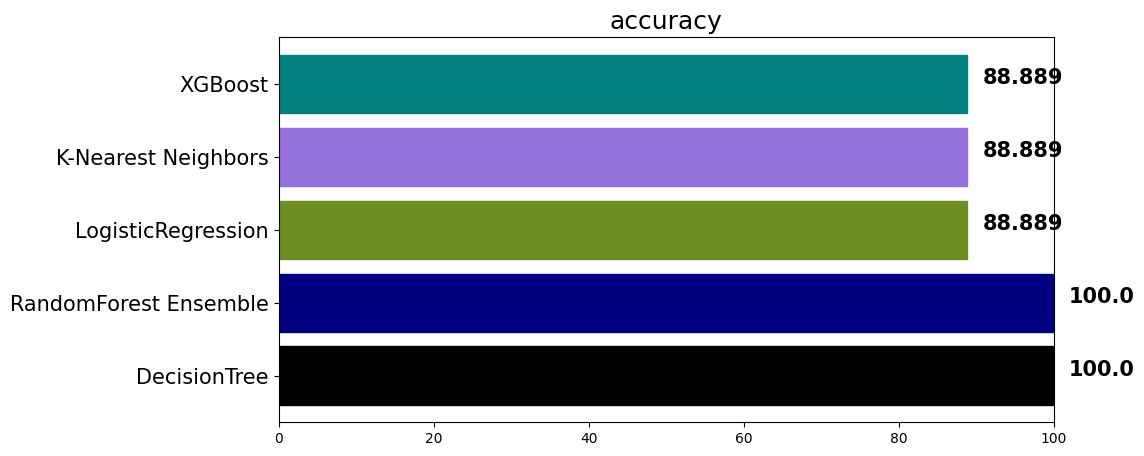

In [ ]:
accuracy_eval('XGBoost', xgb_pred, y_test)

6) Light GBM

* XGBoost와 함께 주목받는 DecisionTree 알고리즘 기반의 Boosting 앙상블 기법
* XGBoost에 비해 학습시간이 짧은 편이다.

주요 특징

* scikit-learn 패키지가 아닙니다.
* 성능이 우수함
* 속도도 매우 빠릅니다.

주요 Hyperparameter
* random_state: 랜덤 시드 고정 값 고정해두고 튜닝할 것!
* n_jobs CPU 사용 갯수
* learning_rate: 학습을 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. 적절한 값을 찾아야함. n_estimators와 같이 튜닝. default=0.1
* n_estimators: 부스팅 스테이지 수. (랜덤포레스트 트리의 갯수 설정과 비슷한 개념). default=100
* max_depth: 트리의 깊이 과대적합 방지용. default=3.
* colsample_bytree: 샘플 사용 비율 (max_features와 비슷한 개념). 과대적합 방지용. default=1.0

In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
#sequential한 부스팅 기법 > 시간이 오래 걸린다

lgbm= LGBMClassifier(n_estimators=3, random_state=42)
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 3, number of negative: 18
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 21, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142857 -> initscore=-1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements


                   model    accuracy
0           DecisionTree  100.000000
1  RandomForest Ensemble  100.000000
2     LogisticRegression   88.888889
3    K-Nearest Neighbors   88.888889
4                XGBoost   88.888889
5         LGBMClassifier   88.888889


<Figure size 1200x900 with 0 Axes>

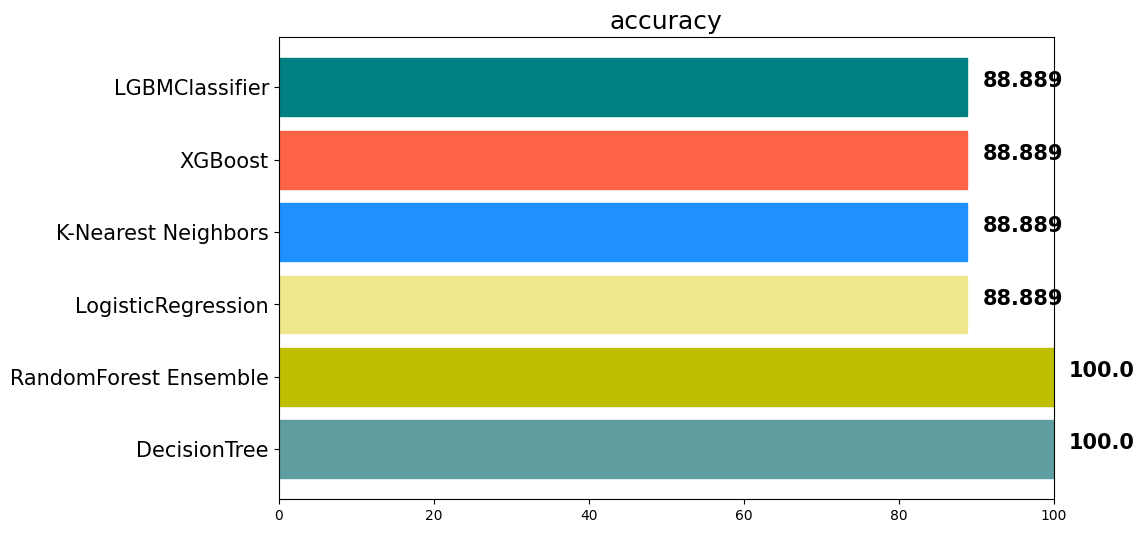

In [ ]:
accuracy_eval('LGBMClassifier', xgb_pred, y_test)
#예상보다 LGBM이 낮다 > 하이퍼파라미터 n_estimators =  30, 50, 100 개도 지정하고 돌려본다 > 시간이 오래걸린다

7) Stacking

개별 모델이 예측한 데이터를 기반으로 final estimator 종합하여 예측을 수행합니다.

성능을 극으로 끌어올릴 때 활용하기도 합니다.   "앙상블의 끝판왕"

과대적합을 유발할 수 있습니다. (특히, 데이터셋이 적은 경우)

In [ ]:
from sklearn.ensemble import StackingRegressor, StackingClassifier

In [ ]:
stack_models = [('LogisticRegression', lg),
                  ('KNN', knn),
                ('DecisionTree', dt)]

In [ ]:
stacking = StackingClassifier(stack_models, final_estimator=rfc, n_jobs=-1)

In [ ]:
stacking.fit(X_train, y_train)

StackingClassifier(estimators=[('LogisticRegression',
                                LogisticRegression(max_iter=3000)),
                               ('KNN', KNeighborsClassifier()),
                               ('DecisionTree',
                                DecisionTreeClassifier(max_depth=10,
                                                       random_state=42))],
                   final_estimator=RandomForestClassifier(n_estimators=3,
                                                          random_state=42),
                   n_jobs=-1)

In [ ]:
stackking_pred = stacking.predict(X_test)


                   model    accuracy
0           DecisionTree  100.000000
1  RandomForest Ensemble  100.000000
2     LogisticRegression   88.888889
3    K-Nearest Neighbors   88.888889
4                XGBoost   88.888889
5         LGBMClassifier   88.888889
6      Stacking Ensemble   77.777778


<Figure size 1200x900 with 0 Axes>

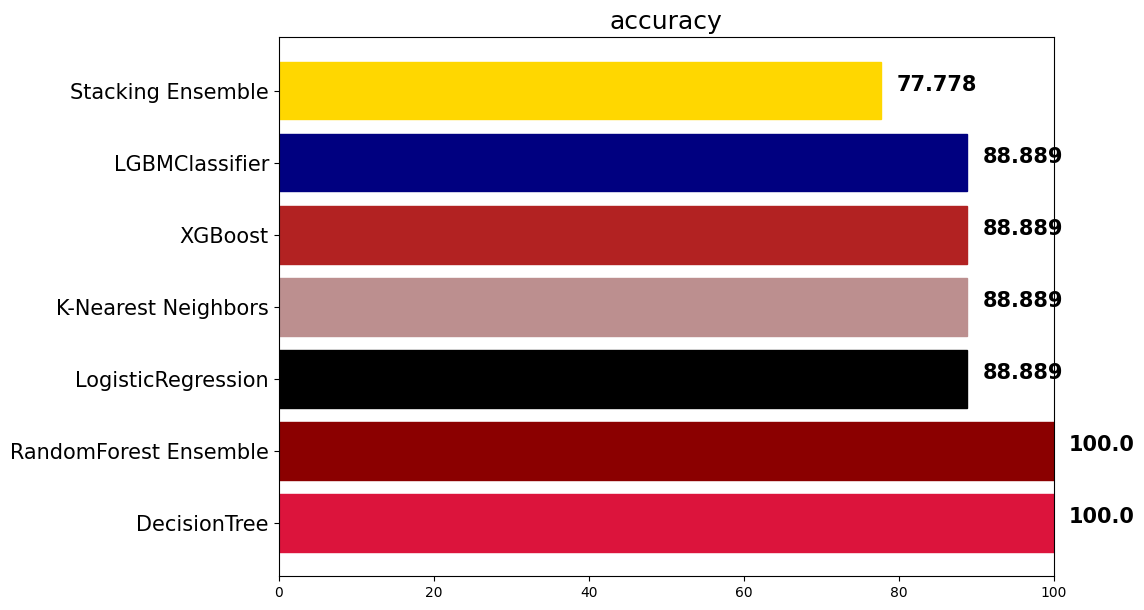

In [ ]:
accuracy_eval('Stacking Ensemble', stackking_pred, y_test)


8) Weighted Blending

각 모델의 예측값에 대하여 weight를 곱하여 최종output 계산
* 모델에 대한 가중치를 조절하여, 최종outpat을 산출합니다.
* 가중치의 합은 1.0이 되도록 합니다.

In [ ]:
final_outputs = {
    'DecisionTree': dt_pred,
    'randomforest' : rfc_pred,
    'xgb': xgb_pred,
    'lgbm': lgbm_pred,
    'stacking': stackking_pred,
}

In [ ]:
final_prediction = \
final_outputs['DecisionTree']*0.1\
+ final_outputs['randomforest']*0.2\
+ final_outputs['xgb']*0.25\
+ final_outputs['lgbm']*0.15\
+ final_outputs['stacking']*0.3

In [ ]:
#가중치 계산값이 0.5 초과시 1, 아니면 0

final_prediction = np.where(final_prediction > 0.5, 1, 0)

                   model    accuracy
0           DecisionTree  100.000000
1  RandomForest Ensemble  100.000000
2     LogisticRegression   88.888889
3    K-Nearest Neighbors   88.888889
4                XGBoost   88.888889
5         LGBMClassifier   88.888889
6      Weighted Blending   88.888889
7      Stacking Ensemble   77.777778


<Figure size 1200x900 with 0 Axes>

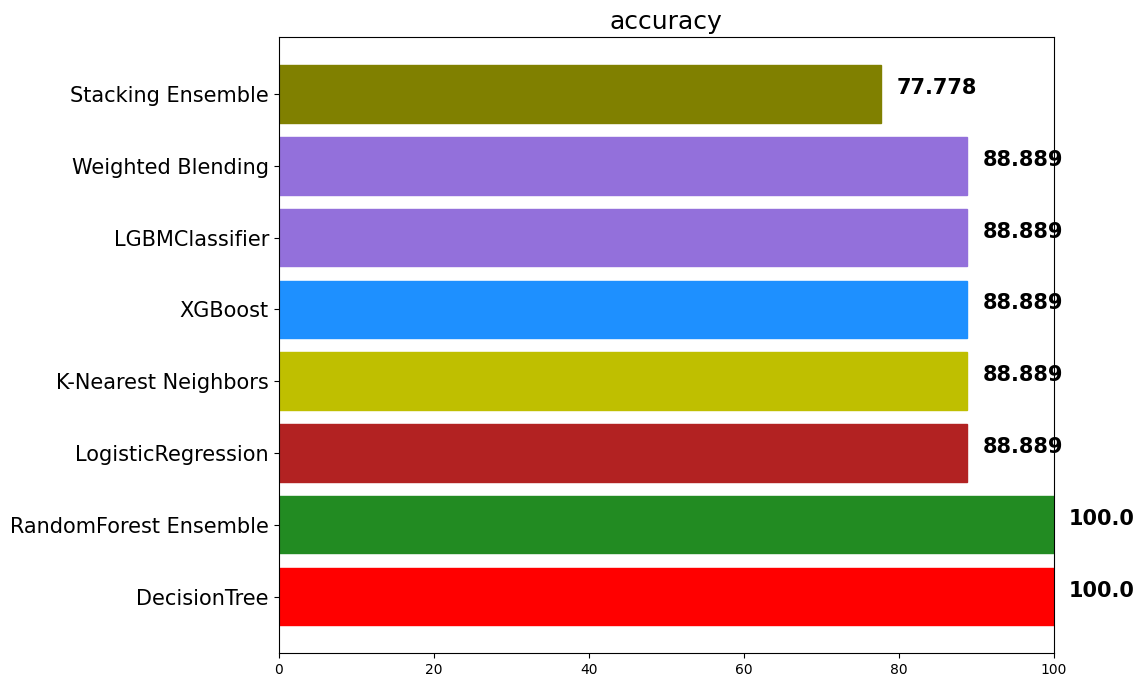

In [ ]:
accuracy_eval('Weighted Blending', final_prediction, y_test)


#배운 내용 정리

1. 머신러닝 모델 프로세스

1) 라이브러리 임포트(import)    
2) 데이터 가져오기(Loading the data)    
3) 탐색적 데이터 분석(Exploratory Data Analysis)    
4) 데이터 전처리(Data PreProcessing): 데이터타입 변환, Null 데이터 처리,누락데이터 처리, 더미특성 생성, 특성 추출 (feature engineering)등    
5) Train, Test 데이터셋 분할    
6) 데이터 정규화(Normalizing the Data)    
7) 모델 개발(Creating the Model)    
8) 모델 성능 평가   


2. 평가 지표 활용:모델별 성능 확인을 위한 함수 (가져다 쓰면 된다)
3. 단일 회귀예측 모델:LogisticRegression, KNN, DecisionTree
4. 앙상블 (Ensemble) : RandomForest, XGBoost, LGBM, Stacking, Weighted Blending